In [1]:
!pip install catboost

In [2]:
# the imports in this cell are required when running from Cloud (Colab/Kaggle)
# before running on cloud you nee to upload the .py files 
# from 'Notebooks/utils' directory
from applyML_util import train_classification, eval_classification, showEvalutationGraph_classification
from featureSelection_util import (pearson_correlation_fs, 
                                   seleckKBest_fs, selectSequential_fs)

**CatBoost Classifier Documentation link:** https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier


In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

In [4]:
# global random seed
RAND_SEED = 42

# initial model with only random seed and not any hyper-parametes
initial_model = CatBoostClassifier(random_state=RAND_SEED, verbose = 0)

# hyper-parameters

max_depth = [5]

n_estimators = list(range(250,350,10))

learning_rate = np.arange(.1 , 1 , .1).tolist()

# dictonary of all hyperparameters

param_grid = {'n_estimators': n_estimators , 'max_depth' : max_depth ,
              'learning_rate': learning_rate}

# variables needed for showEvalGraph_regression() function
MODEL_CLASS = CatBoostClassifier

class_label = 'Rainfall'
x_axis_param_name = 'n_estimators'
x_axis_param_vals = n_estimators


## 1. Experimentation on the Weather Daily Dataset

In [5]:
# Load the train dataset
weather_daily_train_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/train/brri-weather_train_classification.csv')

# Load the test set
weather_daily_test_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/test/brri-weather_test_classification.csv')

### 1.0 No technique

In [ ]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_train_df, cls=class_label)
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

Selected hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 340}
Train set performance: accuracy=0.7721, macro-f1=0.5855


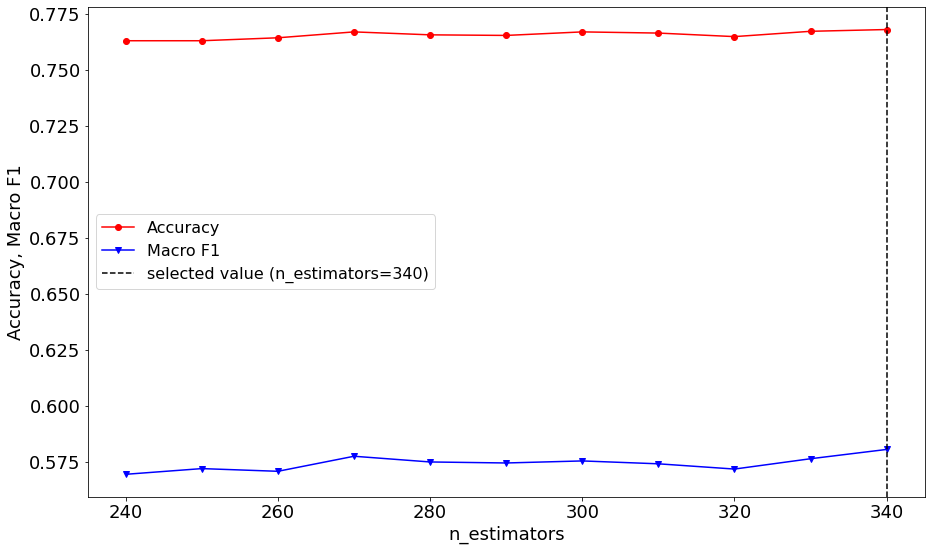

In [ ]:
# graph on train set performance

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED
selected_model_params['verbose'] = 0

showEvalutationGraph_classification(MODEL_CLASS, weather_daily_train_df, cls=class_label, 
                                    x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                    selected_model_params=selected_model_params)

In [ ]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.7798, macro-f1=0.6063


### 1.1 Apply Pearson Feature Selection to Daily Weather Dataset

In [6]:
# select features from the train dataset
weather_daily_fs1_train_df, cols_to_drop = pearson_correlation_fs(weather_daily_train_df, class_label)

# keep only selected features on the test dataset
weather_daily_fs1_test_df = weather_daily_test_df.drop(columns=cols_to_drop)

dropping Sunshine (hour/day) from (Cloudy (hour/day), Sunshine (hour/day))


In [7]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_fs1_train_df, cls=class_label)
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

Selected hyperparameters: {'learning_rate': 0.4, 'max_depth': 5, 'n_estimators': 270}
Train set performance: accuracy=0.7771, macro-f1=0.6078


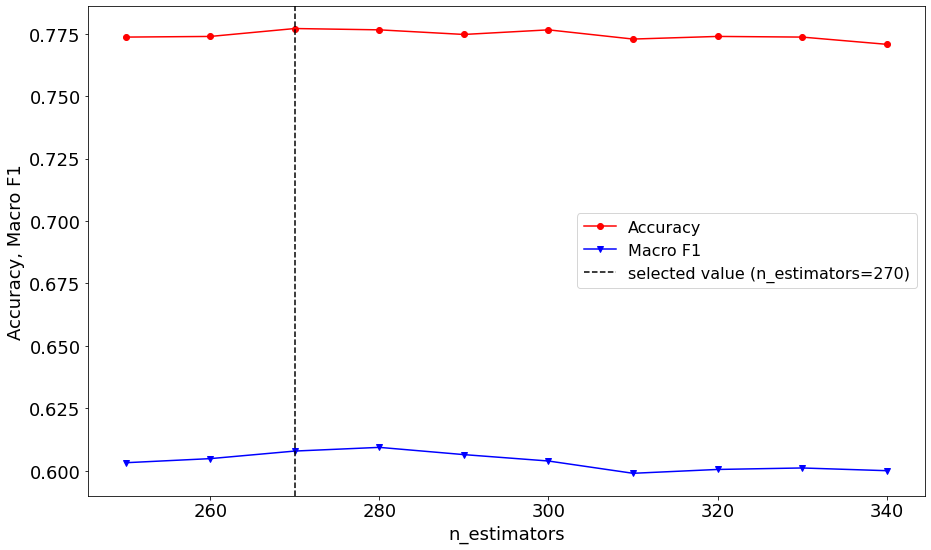

In [8]:
# graph on train set performance

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED
selected_model_params['verbose'] = 0

showEvalutationGraph_classification(MODEL_CLASS, weather_daily_fs1_train_df, cls=class_label, 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                selected_model_params=selected_model_params)

In [9]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_fs1_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.7629, macro-f1=0.5939


### 1.2 Apply SelectKBest Feature Selection to Daily Weather Dataset

In [10]:
# select features from the train dataset
weather_daily_fs2_train_df, cols_to_drop = seleckKBest_fs(weather_daily_train_df, class_label, is_regression=True)

print('features dropped:', cols_to_drop)

# keep only selected features on the test dataset
weather_daily_fs2_test_df = weather_daily_test_df.drop(columns=cols_to_drop)

features dropped: ['Max Temp. (degree Celcius)', 'Relative Humidity (morning, %)']


In [11]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_fs2_train_df, cls=class_label)
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

Selected hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 340}
Train set performance: accuracy=0.7676, macro-f1=0.5959


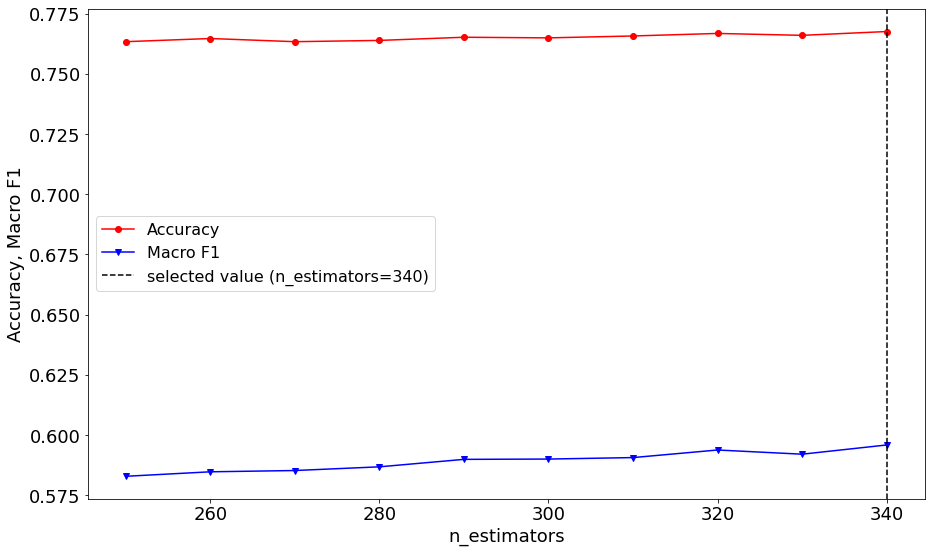

In [12]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED
selected_model_params['verbose'] = 0
showEvalutationGraph_classification(MODEL_CLASS, weather_daily_fs2_train_df, cls=class_label, 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                selected_model_params=selected_model_params)

In [13]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_fs2_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.7766, macro-f1=0.609


### 1.3 SMOTE on Daily Dataset

In [14]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_train_df, 
                                                                             cls=class_label, sampling_technique='smote')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

class distribution before sampling: {1: 1008, 0: 2477, 2: 310}
class distribution after sampling: {1: 2477, 0: 2477, 2: 2477}
Selected hyperparameters: {'learning_rate': 0.7000000000000001, 'max_depth': 5, 'n_estimators': 320}
Train set performance: accuracy=0.8723, macro-f1=0.8718


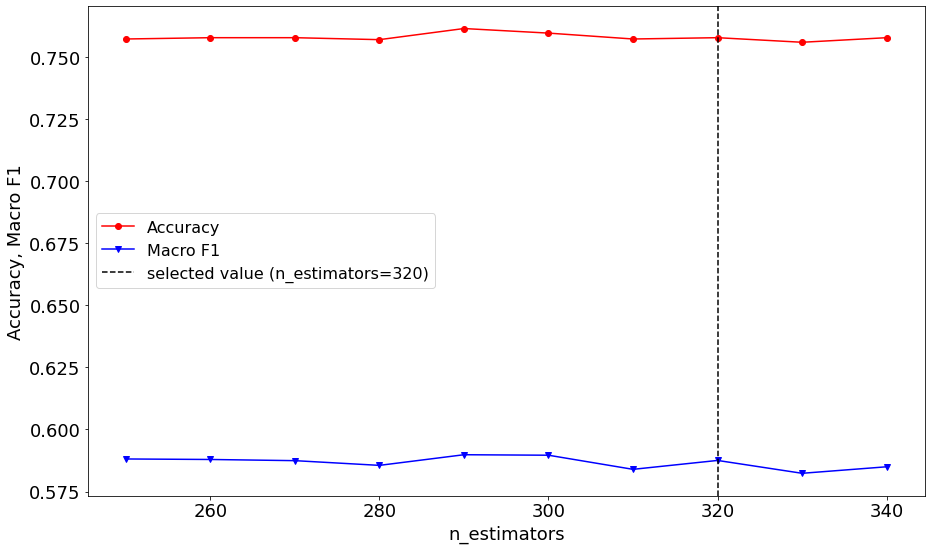

In [15]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED
selected_model_params['verbose'] = 0
showEvalutationGraph_classification(MODEL_CLASS, weather_daily_train_df, cls=class_label, 
                                    x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                    selected_model_params=selected_model_params)

In [16]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.7408, macro-f1=0.5943


### 1.4 Random Undersampling + SMOTE on Daily Dataset

In [17]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_train_df, 
                                                                             cls=class_label, sampling_technique='hybrid')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

class distribution before sampling: {1: 1008, 0: 2477, 2: 310}
class distribution after sampling: {0: 1981, 1: 1981, 2: 1981}
Selected hyperparameters: {'learning_rate': 0.7000000000000001, 'max_depth': 5, 'n_estimators': 330}
Train set performance: accuracy=0.8476, macro-f1=0.8467


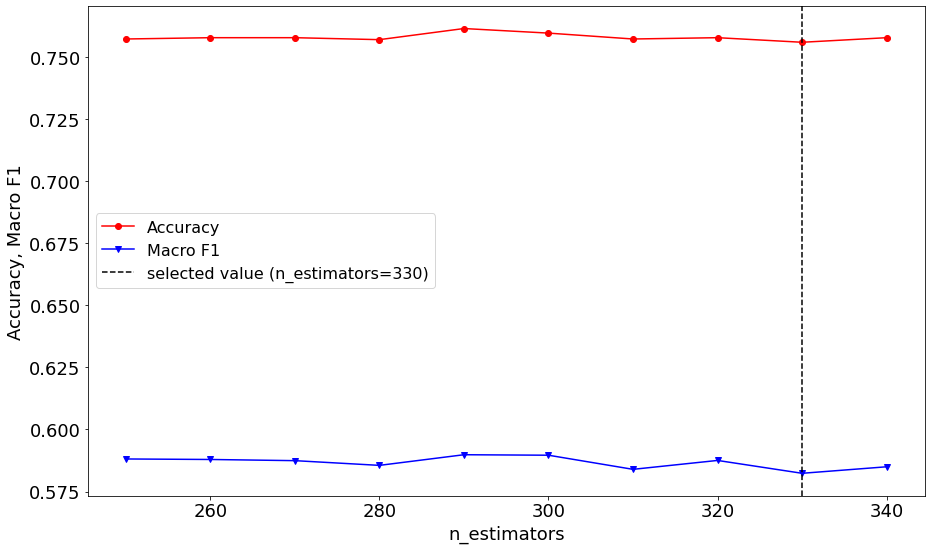

In [18]:
# graph on train set performance

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED
selected_model_params['verbose'] = 0
showEvalutationGraph_classification(MODEL_CLASS, weather_daily_train_df, cls=class_label, 
                                    x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                    selected_model_params=selected_model_params)

In [19]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.7408, macro-f1=0.6045


### 1.5 Pearson Feature Selection + Hybrid Sampling to Daily Weather Dataset

In [20]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_fs1_train_df, 
                                                                             cls=class_label, sampling_technique='hybrid')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

class distribution before sampling: {1: 1008, 0: 2477, 2: 310}
class distribution after sampling: {0: 1981, 1: 1981, 2: 1981}
Selected hyperparameters: {'learning_rate': 0.9, 'max_depth': 5, 'n_estimators': 330}
Train set performance: accuracy=0.8476, macro-f1=0.8465


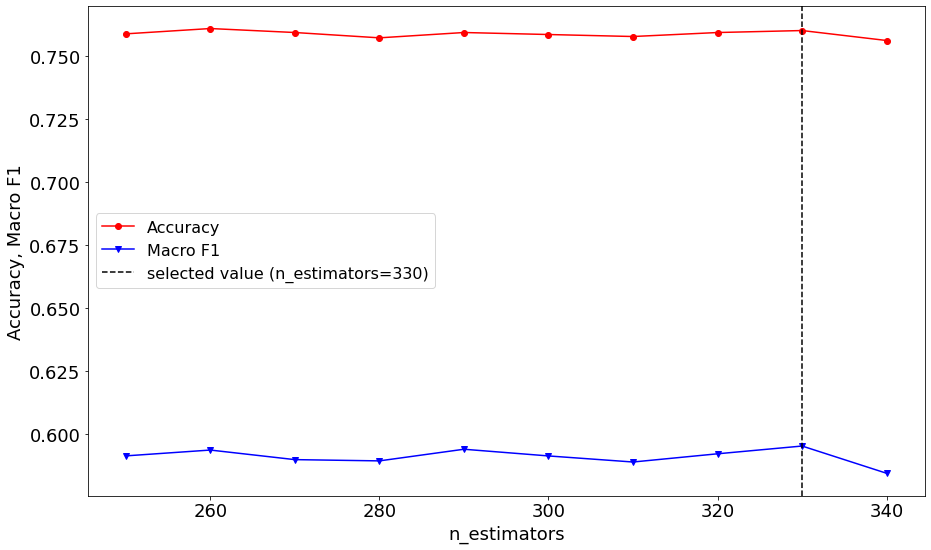

In [21]:
# graph on train set performance

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED
selected_model_params['verbose'] = 0
showEvalutationGraph_classification(MODEL_CLASS, weather_daily_fs1_train_df, cls=class_label, 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                selected_model_params=selected_model_params)

In [22]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_fs1_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.726, macro-f1=0.5705


### 1.6 SelecKBest Feature Selection + Hybrid Sampling to Daily Weather Dataset

In [23]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_fs2_train_df, 
                                                                             cls=class_label, sampling_technique='hybrid')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

class distribution before sampling: {1: 1008, 0: 2477, 2: 310}
class distribution after sampling: {0: 1981, 1: 1981, 2: 1981}
Selected hyperparameters: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 340}
Train set performance: accuracy=0.8306, macro-f1=0.8296


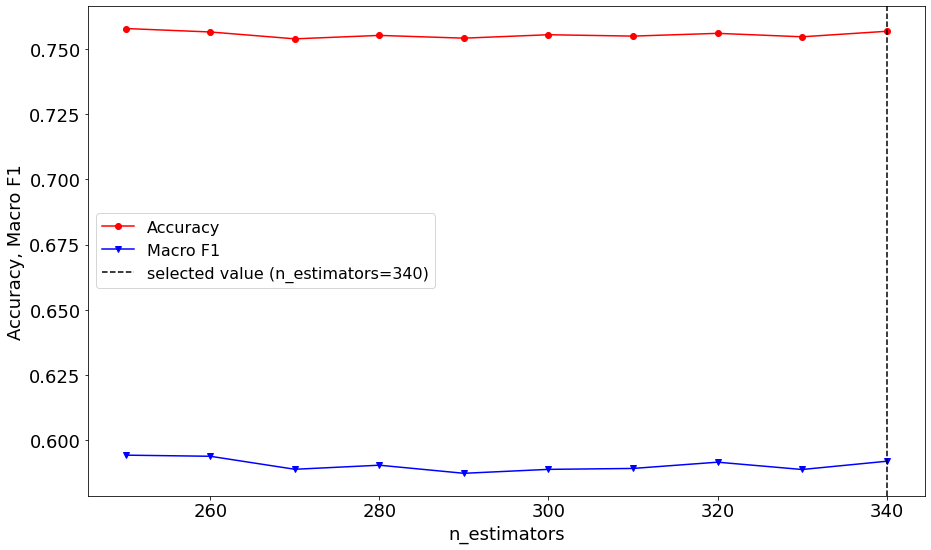

In [24]:
# graph on train set performance

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED
selected_model_params['verbose'] = 0
showEvalutationGraph_classification(MODEL_CLASS, weather_daily_fs2_train_df, cls=class_label, 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                selected_model_params=selected_model_params)

In [25]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_fs2_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.7387, macro-f1=0.6043
